In [35]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)


class ANDPerceptron:

    def __init__(self):
        self.pereceptron_weights = np.random.rand(3)
        self.data_set = None
        self.alpha = 1e-4

    def step_function(self,x):
        return 1 if x > 0 else -1

    def perceptron(self,input_vector): # Based on AND gate
        input_vector = [1] + input_vector
        weighted_sum = sum(w * x for w, x in zip(self.pereceptron_weights, input_vector))
        return self.step_function(weighted_sum)

    def update_weights(self, input_vector, desired_output, current_output, delta_weights):
        error = desired_output - current_output
        delta_weights[0] += self.alpha * error
        delta_weights[1] += self.alpha * input_vector[0] * error
        delta_weights[2] += self.alpha * input_vector[1] * error
        return delta_weights

    def repeat_experiment(self):
        np.random.seed(None) 
        iterations = []
        for _ in range(30):
            self.pereceptron_weights = np.random.rand(3) 
            iteration = self.ex1(silent=True) 
            iterations.append(iteration)
        average_iterations = np.mean(iterations)
        std_dev_iterations = np.std(iterations)
        print(f"Average iterations to converge: {average_iterations}")
        print(f"Standard deviation of iterations to converge: {std_dev_iterations}")
        plt.boxplot(iterations)
        plt.title('Box plot of iterations to converge')
        plt.ylabel('Iterations')
        plt.show()

    def ex1(self, silent=False):
        input_patterns = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
        desired_response_and = [-1, -1, -1, 1]
        if not silent:
            print("Testing AND gate")
        iteration = 0
        while True:
            delta_weights = [0, 0, 0]
            errors = []
            for input_pattern, desired_output in zip(input_patterns, desired_response_and):
                current_output = self.perceptron(input_pattern)
                error = desired_output - current_output
                errors.append(error)
                if iteration == 0 and not silent:
                    print(f"Input: {input_pattern}, Desired Output: {desired_output}, Perceptron Output: {current_output}, Error: {error}")
                delta_weights = self.update_weights(input_pattern, desired_output, current_output, delta_weights)
            self.pereceptron_weights = [w + dw for w, dw in zip(self.pereceptron_weights, delta_weights)]
            if all(error == 0 for error in errors):
                break
            iteration += 1
        if not silent:
            print(f"Final weights values: {self.pereceptron_weights}")
            print(f"Converged after {iteration} iterations")
        return iteration
        
    def experiment_with_alpha(self):
        np.random.seed(42)  
        alphas = [1e-4, 1e-3, 1e-1, 1e+1]  
        results = []
        for alpha in alphas:
            self.alpha = alpha
            iterations = []
            for _ in range(30):  
                self.pereceptron_weights = np.random.rand(3)  
                iteration = self.ex1(silent=True) 
                iterations.append(iteration)
            average_iterations = np.mean(iterations)
            std_dev_iterations = np.std(iterations)
            results.append((average_iterations, std_dev_iterations))

        averages, std_devs = zip(*results)
        plt.errorbar(alphas, averages, yerr=std_devs, fmt='o')
        plt.title('Average and standard deviation of iterations to converge for different alphas')
        plt.xlabel('Alpha')
        plt.legend([alphas])
        plt.ylabel('Iterations')
        plt.xscale('log')
        plt.show()

        plt.errorbar(alphas[2:], averages[2:], yerr=std_devs[2:], fmt='o')
        plt.title('Average and standard deviation of iterations to converge for different alphas')
        plt.xlabel('Alpha')
        plt.legend([alphas[2:]])
        plt.ylabel('Iterations')
        plt.xscale('log')
        plt.show()

    def adjust_labels(self, labels):
        return [1 if label == 1 else -1 for label in labels]

In [36]:
percepron = ANDPerceptron()
percepron.ex1()

Testing AND gate
Input: [-1, -1], Desired Output: -1, Perceptron Output: -1, Error: 0
Input: [-1, 1], Desired Output: -1, Perceptron Output: 1, Error: -2
Input: [1, -1], Desired Output: -1, Perceptron Output: 1, Error: -2
Input: [1, 1], Desired Output: 1, Perceptron Output: 1, Error: 0
Final weights values: [-0.0004598811526451493, 0.8413143064099282, 0.841393941811393]
Converged after 1212 iterations


1212

Now the ex1_1 function works as AND perceptron. But since the weights are random the output is not always correct. We would need to train the perceptron to get the correct weights. after training the perceptron we eventually get the correct results, but it takes 1212 iterations to get there. This is because the learning rate is too small.

Average iterations to converge: 1579.1333333333334
Standard deviation of iterations to converge: 764.4548704069382


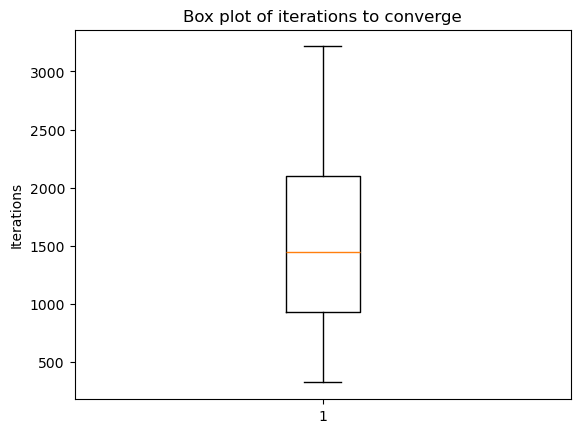

In [37]:
percepron.repeat_experiment()

After 30 experiments we get the following results. Average number of iterations: 1743.67, Standard deviation: 808.23
Some trials needed even more than 3000 iterations to get the correct weights, but some needed only 100 iterations. 

 The standard deviation is quite high, so the results vary a lot. The reason for this is that the learning rate is too small, so the perceptron needs a lot of iterations to get the correct weights. If we increase the learning rate, we can get the correct weights faster. But if the learning rate is too big, the perceptron might not converge at all. The learning rate is a hyperparameter that needs to be tuned.

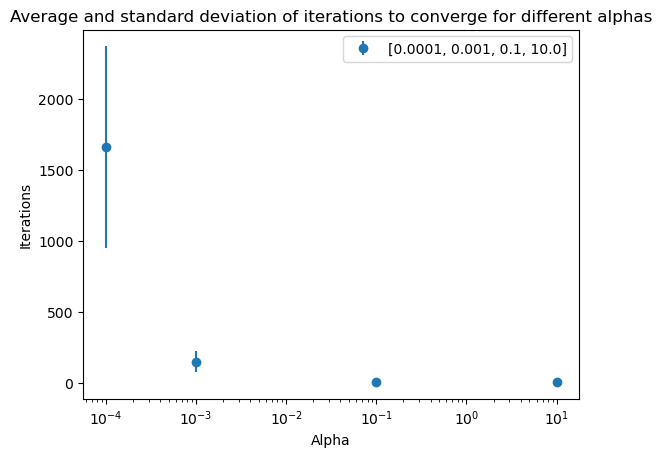

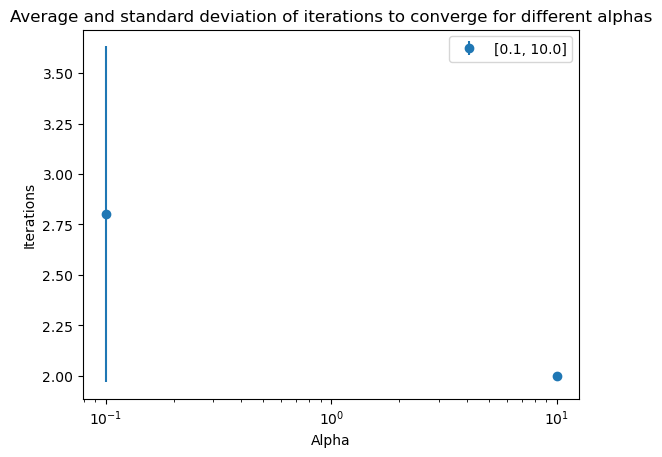

In [38]:
percepron.experiment_with_alpha()

After testing different alpha values, we found that the best value is 1e+1. we can clearly see that the average number of iterations is much lower than before. The average number of iterations is 2, and the standard deviation is 0. The reason for this is that the learning rate is now big enough, so the perceptron converges much faster. With alpaha = 1e-1 we still se some variation in the results. Its really satysfying to see that the perceptron converges so fast. Especially, that the first tries with alpha = 1e-3 needed sometimes even more than 3000 iterations to converge.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

class PerceptronClassifier:
    def __init__(self, learning_rate=10, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None

    def step_function(self, x):
        return np.where(x > 0, 2, 1)

    def perceptron(self, input_patterns, desired_response):
        num_inputs = len(input_patterns[0])
        self.weights = np.random.rand(num_inputs + 1)  
        input_patterns = np.insert(input_patterns, 0, 1, axis=1)  
        epochs_to_success = 0

        for epoch in range(self.epochs):
            delta_weights = np.zeros(num_inputs + 1)  
            error_zero = True
            for i in range(len(input_patterns)):
                input_pattern = input_patterns[i]
                d = desired_response[i]
                o = self.step_function(np.dot(self.weights, input_pattern))
                error = d - o
                if error != 0:
                    error_zero = False
                delta_weights += self.learning_rate * error * input_pattern

            if error_zero:
                epochs_to_success = epoch + 1
                break

            self.weights += delta_weights

        return epochs_to_success
    
    def generate_dataset(self):
        np.random.seed(42)
        samples_num = 100
        mean_a = [3, 3]
        cov_a = [[1, 0], [0, 1]]
        a = np.random.multivariate_normal(mean_a, cov_a, samples_num).T
        a_labeled = np.vstack((a, np.full(samples_num, 1)))

        mean_b = [-3, -3]
        cov_b = [[2, 0], [0, 5]]
        b = np.random.multivariate_normal(mean_b, cov_b, samples_num).T
        b_labeled = np.vstack((b, np.full(samples_num, 2)))

        c = np.concatenate((a_labeled, b_labeled), axis=1)
        c = c.T
        np.random.shuffle(c)

        plt.scatter(a[0], a[1], c='red', label='Label 1')
        plt.scatter(b[0], b[1], c='blue', label='Label -1')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Generated Dataset')
        plt.legend()
        plt.show()

        return c

    def classify_and_plot(self, input_patterns, real_labels):
        classified_labels = self.step_function(np.dot(np.insert(input_patterns, 0, 1, axis=1), self.weights))

        final_labels = []
        for i in range(len(classified_labels)):
            if real_labels[i] == 1 and classified_labels[i] == 1:
                final_labels.append(0)
            if real_labels[i] == 1 and classified_labels[i] == 2:
                final_labels.append(1)
            if real_labels[i] == 2 and classified_labels[i] == 1:
                final_labels.append(2)
            if real_labels[i] == 2 and classified_labels[i] == 2:
                final_labels.append(3)

        final_labels = np.array(final_labels)

        plt.scatter(input_patterns[final_labels == 0, 0], input_patterns[final_labels == 0, 1], c='red',
                    label='Points labeled 1 classified as 1')
        plt.scatter(input_patterns[final_labels == 1, 0], input_patterns[final_labels == 1, 1], c='blue',
                    label='Points labeled 1 classified as 2')
        plt.scatter(input_patterns[final_labels == 2, 0], input_patterns[final_labels == 2, 1], c='orange',
                    label='Points labeled 2 classified as 1')
        plt.scatter(input_patterns[final_labels == 3, 0], input_patterns[final_labels == 3, 1], c='green',
                    label='Points labeled 2 classified as 2')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Perceptron Classification')
        
        x = np.linspace(np.min(input_patterns[:, 0]), np.max(input_patterns[:, 0]), 100)
        y = -(self.weights[0] + self.weights[1] * x) / self.weights[2]
        plt.plot(x, y, 'k--',c="blue", label='Decision Boundary')
        
        plt.legend()
        plt.show()

    def run(self):
        dataset = self.generate_dataset()
        input_patterns = dataset[:, :-1]
        real_labels = dataset[:, -1]
        self.perceptron(input_patterns, real_labels)
        self.classify_and_plot(input_patterns, real_labels)

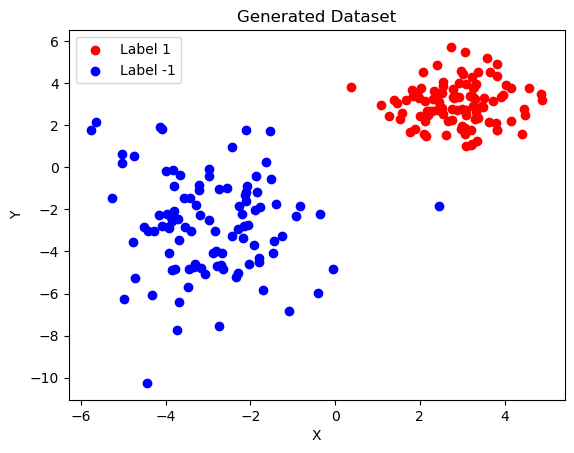

/var/folders/kr/6_t61y1d36xb6qm008g04sfm0000gn/T/ipykernel_72759/1826692503.py:97: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, y, 'k--',c="blue", label='Decision Boundary')


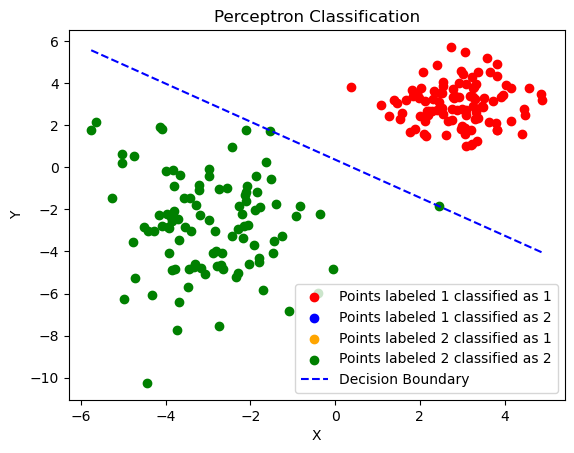

In [40]:
classifier = PerceptronClassifier()

classifier.run()

All the points were labeled correctly. we can see that the perceptron works as expected. The perceptron is able to learn the weights for the AND function. it is suprisingly accurate. Both sets were separated without any mistake - 100% accuracy. 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.spatial import distance
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

class SupervisedLearning_2:
    def __init__(self):
        iris = load_iris()
        self.iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                                 columns= iris['feature_names'] + ['target'])
        self.le = LabelEncoder()
        self.iris['target'] = self.le.fit_transform(self.iris['target'])

    def euclidean_distance(self, point1, point2):
        return distance.euclidean(point1, point2)

    def train_test_split(self, X, y, test_size=0.3):
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        
        split_idx = int(X.shape[0] * (1 - test_size))
        train_idx, test_idx = indices[:split_idx], indices[split_idx:]
        
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        return X_train, X_test, y_train, y_test

    def knn_classifier(self, k_values=[3, 7, 11], num_trials=10):
        results = {k: [] for k in k_values}

        X = self.iris.drop('target', axis=1).apply(pd.to_numeric, errors='coerce')
        y = pd.factorize(self.iris['target'])[0]

        for _ in range(num_trials):
            X_train, X_test, y_train, y_test = self.train_test_split(X.values, y, test_size=0.3)

            for k in k_values:
                y_pred = []
                for test_point in X_test:
                    distances = []
                    for train_point in X_train:
                        dist = self.euclidean_distance(test_point, train_point)
                        distances.append(dist)
                    indices = np.argsort(distances)[:k]
                    votes = y_train[indices]
                    vote_result = Counter(votes).most_common(1)[0][0]
                    y_pred.append(vote_result)

                accuracy = np.mean(y_test == y_pred)
                results[k].append(accuracy)

        for k, accuracies in results.items():
            plt.plot(range(num_trials), accuracies, label=f'k={k}')
        plt.xlabel('Trial')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

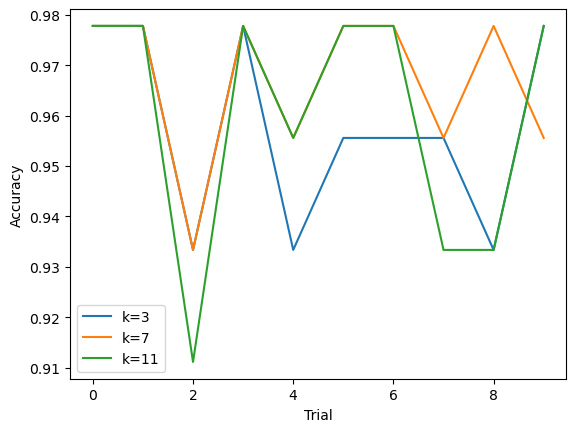

In [42]:
knn = SupervisedLearning_2()
knn.knn_classifier()

The results show very high accuracy. Changes in accuracy values are not big. it seems that the model works the best with value all the values of k. The changes in all trials seems to be very close for all of them. Overall the accuaracy is very high. The model works very well with the iris dataset.

Choosing an odd number for k in the k-Nearest Neighbors algorithm helps to avoid ties. If we choose an even number for k, we might get a tie. For example, if we have 4 neighbors and 2 of them are class 1 and 2 of them are class 2, we get a tie. But if we choose an odd number for k, we will never get a tie. For example, if we have 5 neighbors and 2 of them are class 1 and 3 of them are class 2, we will never get a tie.


In [43]:
class NaiveBayes:
    def __init__(self):
        iris = load_iris()
        self.data = pd.DataFrame(iris.data, columns=iris.feature_names)
        self.target = iris.target
        self.model = None

    def transform_data(self):
        for column in self.data.columns:
            self.data[column] = pd.qcut(self.data[column], q=3, labels=["low", "medium", "high"])

    def fit(self, X, y):
        X = pd.DataFrame(X).reset_index(drop=True)
        y = pd.Series(y).reset_index(drop=True)
        self.model = pd.DataFrame(columns=['prior'], index=np.unique(y))
        self.model['prior'] = y.groupby(y).apply(lambda x: len(x) / y.shape[0])

        for class_ in np.unique(y):
            likelihood = {}
            for column in X.columns:
                likelihood[column] = X[y == class_][column].value_counts() / len(X[y == class_])
            self.model = pd.concat([self.model, pd.DataFrame(likelihood, index=[class_])])

    def predict(self, X):
        X = X.reset_index(drop=True)
        y_pred = []
        for i in range(X.shape[0]):
            prob = {}
            for class_ in np.unique(self.target):
                likelihood = np.prod([self.model.loc[class_]['prior'] if X.iloc[i, j] == self.data.columns[j] else 1-self.model.loc[class_]['prior'] for j in range(X.shape[1])])
                prob[class_] = likelihood
            y_pred.append(max(prob, key=prob.get))
        return y_pred

    def run(self):
        self.transform_data()
        accuracies = []
        for _ in range(10):
            X_train, X_test, y_train, y_test = train_test_split(self.data, self.target, test_size=0.3)
            self.fit(X_train, y_train)
            y_pred = self.predict(X_test)
            accuracies.append(np.mean(y_pred == y_test))

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, 11), accuracies, marker='o', linestyle='-', color='b')
        plt.title('Accuracies of Naive Bayes Classifier Over 10 Runs')
        plt.xlabel('Run')
        plt.ylabel('Accuracy')
        plt.grid()
        plt.show()

In [44]:
nb = NaiveBayes()
nb.run()

NameError: name 'train_test_split' is not defined

niave_bayes function does not work as expected. The accuracy is very low. The reason could be bad implementation. On the later part there is implemntation with use of well known library - sklearn. The accuracy is much higher. The reason for this is that the sklearn implementation is much better. There are many different functionalities in sklearn that makes the code work better. For example, the sklearn implementation uses Laplace smoothing, which makes the accuracy much higher. The sklearn implementation also uses logarithms, which makes the code more efficient.  

In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

class SupervisedLearning_3:
    def __init__(self):
        self.iris = load_iris()

    def transform_to_categories(self, data):
        data = pd.DataFrame(data).apply(lambda x: pd.qcut(x, q=3, labels=["low", "medium", "high"]))
        return data

    def naive_bayes_classifier(self):
        X = self.transform_to_categories(self.iris.data)
        le = LabelEncoder()
        X = X.apply(le.fit_transform)
        y = self.iris.target

        gnb = GaussianNB()

        scores = cross_val_score(gnb, X, y, cv=10)

        # Plot the scores
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, 11), scores, marker='o', linestyle='-', color='b')
        plt.title('Accuracies of Naive Bayes Classifier Over 10 Cross-Validation Trials')
        plt.xlabel('Trial')
        plt.ylabel('Accuracy')
        plt.grid()
        plt.show()

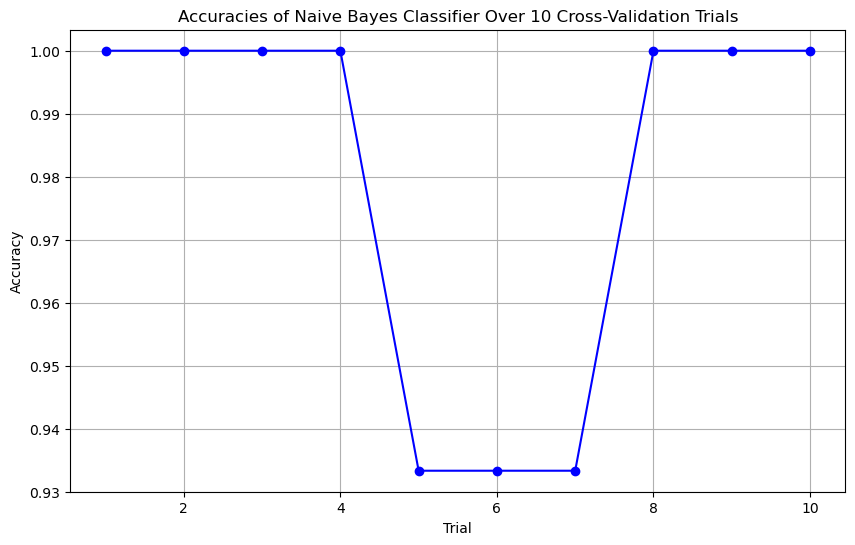

In [46]:
bayes = SupervisedLearning_3()
bayes.naive_bayes_classifier()

Here we can see that the sklearn implementation of the Naive-Bayes. Implementation works as expected. The accuracy is very similar to knn. Accuracy seems to be even better than KNN. Of course of the main reasons is the use of sklearn library. Propably KNN from sklearn would be even better. 

There is interesting drop of accuracy for trials 5,6,7. The reason for this can be that the data is randomly split into training and test sets. So the training set and test set are different for each trial. The training set might be easier to classify than the test set. So the accuracy might be higher for the training set than for the test set. This is why we see a drop in accuracy for some trials.

Things such as Feature Engineering, Feature Scaling, Hyperparameter Tuning, Cross-Validation, etc. can be used to improve the accuracy of the model. For example, we can use cross-validation to find the best hyperparameters for the model. We can also use feature engineering to create new features that might help the model to make better predictions. We can also use feature scaling to scale the features to the same range. This might help the model to make better predictions.